Selected directory: C:/Users/oes6098/Desktop/test phalloiding plot profiles
Processing condition folder: C:/Users/oes6098/Desktop/test phalloiding plot profiles\27del
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\27del\10\Valuesk.csv
Added column '10_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\27del\11\Valuesk.csv
Added column '11_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\27del\3\Valuesk.csv
Added column '3_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\27del\4\Valuesk.csv
Added column '4_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\27del\5\Valuesk.csv
Added column '5_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\27del\6\Valuesk.csv
Added column '6_Valuesk' to dataframe.
Processing CS

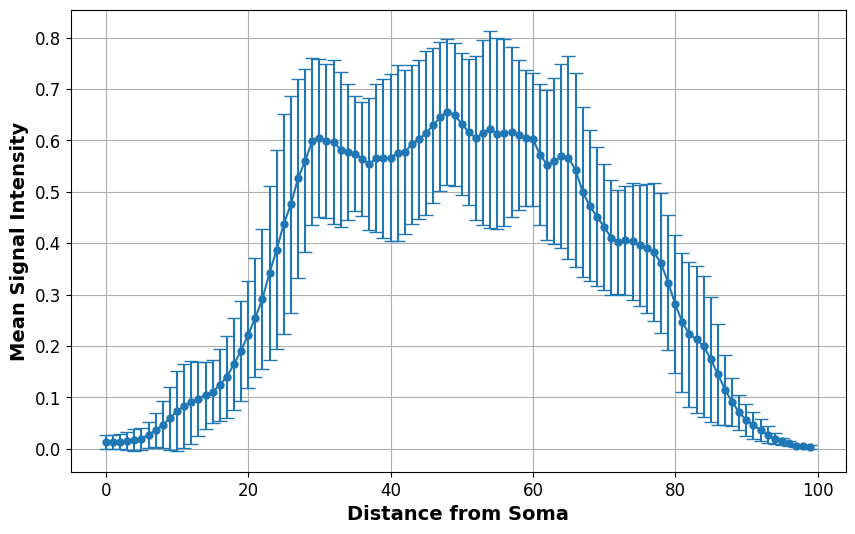

Plot saved as vector image file (EPS): C:/Users/oes6098/Desktop/test phalloiding plot profiles\27del\signal_intensity_plot_condition_0.eps
Processing condition folder: C:/Users/oes6098/Desktop/test phalloiding plot profiles\854
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\854\1\Valuesk.csv
Added column '1_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\854\10\Valuesk.csv
Added column '10_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\854\11\Valuesk.csv
Added column '11_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\854\2\Valuesk.csv
Added column '2_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\854\3\Valuesk.csv
Added column '3_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\854\5\Valuesk.csv
Add

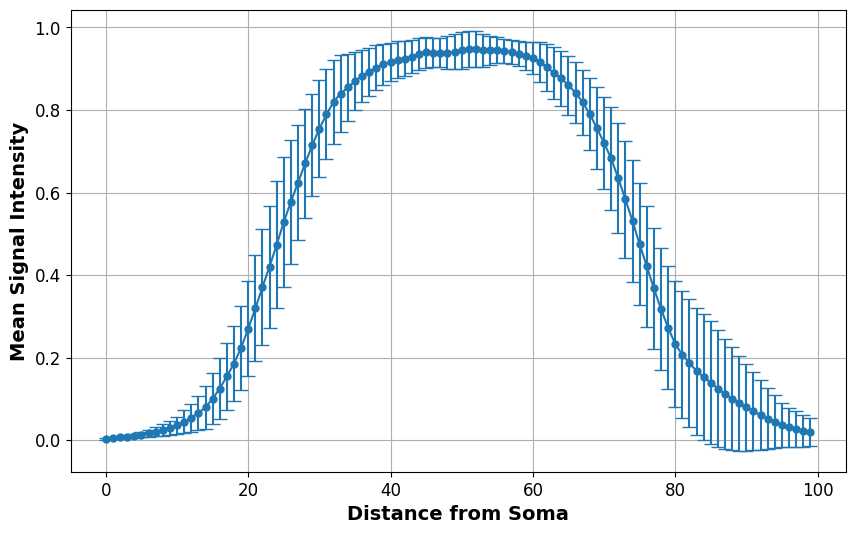

Plot saved as vector image file (EPS): C:/Users/oes6098/Desktop/test phalloiding plot profiles\854\signal_intensity_plot_condition_1.eps
Processing condition folder: C:/Users/oes6098/Desktop/test phalloiding plot profiles\wt
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\wt\1\Valuesk.csv
Added column '1_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\wt\2\Valuesk.csv
Added column '2_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\wt\3\Valuesk.csv
Added column '3_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\wt\4\Valuesk.csv
Added column '4_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\wt\5\Valuesk.csv
Added column '5_Valuesk' to dataframe.
Processing CSV file: C:/Users/oes6098/Desktop/test phalloiding plot profiles\wt\6\Valuesk.csv
Added column '6_

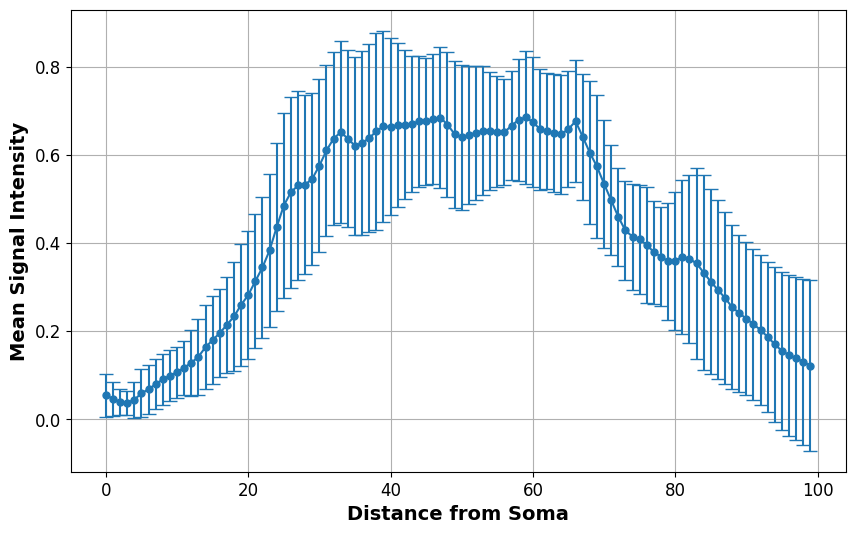

Plot saved as vector image file (EPS): C:/Users/oes6098/Desktop/test phalloiding plot profiles\wt\signal_intensity_plot_condition_2.eps


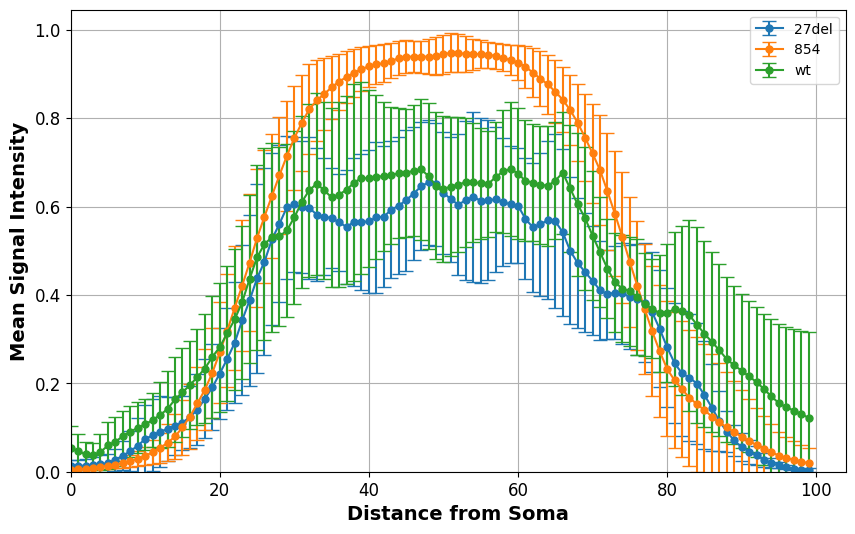

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog

def normalize(filepath, numpoints, foldername, filename, percentilelist, df):
    print(f"Processing CSV file: {filepath}")
    
    # Import data from CSV file
    data = pd.read_csv(filepath)
    X1 = data.iloc[:, 0]
    Y1 = data.iloc[:, 1]
    
    # Normalize X-values
    Xnorm = (X1 - X1.min()) / (X1.max() - X1.min())
    
    # Normalize Y-values
    Ynorm = (Y1 - Y1.min()) / (Y1.max() - Y1.min())
    
    # Interpolate to ensure exactly num_points values
    Xnorm_interp = np.linspace(0, 1, numpoints)
    Ynorm_interp = np.interp(Xnorm_interp, Xnorm, Ynorm)
    
    # Add normalized Y-values to the dataframe as a new column
    column_name = f"{foldername}_{os.path.splitext(filename)[0]}"
    df[column_name] = Ynorm_interp
    print(f"Added column '{column_name}' to dataframe.")

    # Calculate the 95th percentile
    ninety_fifth_percentile = np.percentile(Ynorm_interp, 95)
    
    # Append the filename and 95th percentile to the list
    percentilelist.append({'File': filename, '95th Percentile': ninety_fifth_percentile})

    return df, percentilelist

# Compute mean and 95% CI
def confidence_interval(df):
    meanintensity = df.mean(axis=1)  # Mean across different cells
    stdintensity = df.std(axis=1)     # Standard deviation across different cells
    n = df.shape[1]                    # Number of cells
    ci = 1.96 * (stdintensity / np.sqrt(n))  # 95% CI

    return meanintensity, ci

# def plot(df, condition_folder, conditionFolderPath, i, mean_intensity, ci):
#     # Plot mean signal intensity with error bars and a connecting line
#     plt.figure(figsize=(10, 6))  # Adjust figure size
#     plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5, label=condition_folder)
#     plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
#     plt.ylabel('Signal Intensity', fontsize=14, fontweight='bold')
#     plt.title('Signal Intensity along Axon with 95% CI', fontsize=16, fontweight='bold')
#     plt.xticks(fontsize=12)  # Increase x-axis tick font size
#     plt.yticks(fontsize=12)  # Increase y-axis tick font size
#     plt.grid(True)
#     plt.legend()  # Show legend

#     # Save the plot as a vector image file (EPS) in the same directory as the Excel file
#     plotFilePath = os.path.join(conditionFolderPath, f'signal_intensity_plot_condition_{i}.eps')
#     plt.savefig(plotFilePath, format='eps')
#     print(f"Plot saved as vector image file (EPS): {plotFilePath}")

#     plt.show()


# def plot(df, condition_folder, conditionFolderPath, i, mean_intensity, ci):
#     # Calculate the upper and lower bounds for the shaded region
#     lower_bound = mean_intensity - ci
#     upper_bound = mean_intensity + ci

#     # Plot mean signal intensity with a connecting line and shaded region for error
#     plt.figure(figsize=(10, 6))  # Adjust figure size
#     plt.plot(df.index, mean_intensity, 'o-', markersize=5, label=condition_folder)
#     plt.fill_between(df.index, lower_bound, upper_bound, alpha=0.2)

#     plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
#     plt.ylabel('Signal Intensity', fontsize=14, fontweight='bold')
#     plt.title('Signal Intensity along Axon with 95% CI', fontsize=16, fontweight='bold')
#     plt.xticks(fontsize=12)  # Increase x-axis tick font size
#     plt.yticks(fontsize=12)  # Increase y-axis tick font size
#     plt.grid(True)
#     plt.legend()  # Show legend

#     # Save the plot as a vector image file (EPS) in the same directory as the Excel file
#     plotFilePath = os.path.join(conditionFolderPath, f'signal_intensity_plot_condition_{i}.eps')
#     plt.savefig(plotFilePath, format='eps')
#     plt.show()
#     plt.close()  # Close the figure to avoid display issues in some environments
#     print(f"Plot saved as vector image file (EPS): {plotFilePath}")

# def plot(df, condition_folder, conditionFolderPath, i, mean_intensity, ci):
#     # Calculate the upper and lower bounds for the shaded region
#     lower_bound = mean_intensity - ci
#     upper_bound = mean_intensity + ci

#     # Plot mean signal intensity with a connecting line and shaded region for error
#     plt.figure(figsize=(10, 6))  # Adjust figure size
#     plt.plot(df.index, mean_intensity, '-', label=condition_folder)  # Line plot without individual dots
#     plt.fill_between(df.index, lower_bound, upper_bound, color='lightblue', alpha=0.5)  # Light blue shaded region

#     plt.xlabel('Normalized Distance (0-100)', fontsize=14, fontweight='bold')  # Updated x-axis label
#     plt.ylabel('Normalized Signal Intensity [AR]', fontsize=14, fontweight='bold')  # Updated y-axis label
#     plt.title('Signal Intensity along Axon with 95% CI', fontsize=16, fontweight='bold')
#     plt.xticks(fontsize=12)  # Increase x-axis tick font size
#     plt.yticks(fontsize=12)  # Increase y-axis tick font size
#     plt.grid(True)
#     plt.legend()  # Show legend

#     # Save the plot as a vector image file (EPS) in the same directory as the Excel file
#     plotFilePath = os.path.join(conditionFolderPath, f'signal_intensity_plot_condition_{i}.eps')
#     plt.savefig(plotFilePath, format='eps')
#     plt.close()  # Close the figure to avoid display issues in some environments
#     print(f"Plot saved as vector image file (EPS): {plotFilePath}")

def plot(df, folder_name, folder_path, num, mean_intensity, CI):
    plt.figure(figsize=(10, 6))
    plt.errorbar(df.index, mean_intensity, yerr=CI, fmt='o-', capsize=5, markersize=5)
    plt.xlabel('Distance from Soma', fontsize=14, fontweight='bold')
    plt.ylabel('Mean Signal Intensity', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    # Save the plot as a vector image file (EPS) in the same directory as the condition folder
    plotFilePath = os.path.join(folder_path, f'signal_intensity_plot_condition_{num}.eps')
    plt.savefig(plotFilePath, format='eps')
    plt.show()
    plt.close()  # Close the figure to avoid display issues in some environments
    print(f"Plot saved as vector image file (EPS): {plotFilePath}")





# Prompt the user for the number of conditions and their names
num_conditions = int(input("Enter the number of conditions: "))

condition_names = []
for i in range(num_conditions):
    folder_name = input(f"Enter the folder name for condition {i + 1}: ")
    condition_names.append(folder_name)

# Ask the user if they want to perform over multiple replicates or one
replicates = input("Do you have multiple replicates? (y/n): ").strip().lower() == 'y'

csv_name = input("What is the name of the plot profile files you want to analyze?: ")

# Select directory containing the folders
dirPath = filedialog.askdirectory(title='Select directory containing folders')
print(f"Selected directory: {dirPath}")

# Number of points after normalization
num_points = 100

if num_conditions == 1:

    # Initialize an empty list to store 95th percentile values
    percentile_list = []    

    df1 = pd.DataFrame()

    # Loop through each folder in the directory
    for folder_name in os.listdir(dirPath):
        folder_path = os.path.join(dirPath, folder_name)
        print(f"Processing folder: {folder_path}")
        
        # Loop through each CSV file in the folder
        for file_name in os.listdir(folder_path):
            print(file_name)
            if file_name==(csv_name+'.csv'):
                file_path = os.path.join(folder_path, file_name)

                # Normalize the data and add it to the dataframe
                normalize(file_path, num_points, folder_name, file_name, percentile_list, df1)

    # Save the dataframe to an Excel file in the selected directory
    excelFilePath = os.path.join(dirPath, 'normalized_data.xlsx')
    df1.to_excel(excelFilePath, index=False)
    print(f"Dataframe saved to Excel file: {excelFilePath}")

    # Compute mean and 95% CI
    mean_intensity, CI = confidence_interval(df1)

    # Plot mean signal intensity with error bars and a connecting line
    plot(df1, folder_name, folder_path, 1, mean_intensity, CI)

    # Convert the list of dictionaries to a DataFrame
    percentile_df = pd.DataFrame(percentile_list)

    # Save the dataframe with individual file percentiles to a CSV file
    percentile_df.to_excel(os.path.join(dirPath, 'individual_percentiles.xlsx'), index=False)
    print("Individual percentiles saved to Excel file.")



else:
    if replicates:
        exit()
        

    # else:
    #     # Get a list of directories (folders) in the selected directory
    #     condition_folders = [folder for folder in os.listdir(dirPath) if os.path.isdir(os.path.join(dirPath, folder))]
    #     print("Condition folders:", condition_folders)

    #     # Initialize an empty dictionary to store DataFrames for each condition folder
    #     dfs = {}

    #     for i, condition_folder in enumerate(condition_folders):
    #         condition_folder_path = os.path.join(dirPath, condition_folder)

    #         if not os.path.isdir(condition_folder_path):
    #             continue

    #         print(f"Processing condition folder: {condition_folder_path}")

    #         # Initialize an empty dataframe for the current condition folder
    #         df1 = pd.DataFrame()

    #         # Initialize an empty list to store 95th percentile values for each file in the current condition folder
    #         percentile_list = []

    #         # Loop through each folder in the condition folder
    #         for folder_name in os.listdir(condition_folder_path):
    #             folder_path = os.path.join(condition_folder_path, folder_name)
    #             if os.path.isdir(folder_path):
    #                 print(f"Processing folder: {folder_path}")
                    
    #                 # Loop through each CSV file in the folder
    #                 for file_name in os.listdir(folder_path):
    #                     print(file_name)
    #                     if file_name==(csv_name+'.csv'):
    #                         file_path = os.path.join(folder_path, file_name)

    #                         # Normalize the data and add it to the dataframe
    #                         normalize(file_path, num_points, folder_name, file_name, percentile_list, df1)
                
    #         # Save the dataframe to an Excel file in the condition folder
    #         excelFilePath = os.path.join(condition_folder_path, f'normalized_data_condition_{i}.xlsx')
    #         df1.to_excel(excelFilePath, index=False)
    #         print(f"Dataframe saved to Excel file: {excelFilePath}")

    #         # Convert the list of dictionaries to a DataFrame
    #         percentile_df = pd.DataFrame(percentile_list)

    #         # Save the dataframe with individual file percentiles to a CSV file
    #         percentile_df.to_excel(os.path.join(condition_folder_path, f'individual_95percentiles_{i}.xlsx'), index=False)
    #         print(f"Individual percentiles saved to Excel file: {excelFilePath}")

    #         # Store the dataframe in the dictionary with the condition folder name as key
    #         dfs[condition_folder] = df1

    #         # Compute mean and 95% CI
    #         mean_intensity, CI = confidence_interval(df1)

    #         # Plot mean signal intensity with error bars and a connecting line
    #         plot(df1, folder_name, folder_path, 1, mean_intensity, CI)
            
    #     plt.figure(figsize=(10, 6))  # Adjust figure size

    #     # Plot each condition's mean signal intensity with 95% CI and different colors
    #     for condition, df in dfs.items():
    #         mean_intensity = df.mean(axis=1)
    #         std_intensity = df.std(axis=1)
    #         n = df.shape[1]
    #         ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI
    #         plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5, label=condition)

    #     plt.xlabel('Distance from Soma', fontsize=14, fontweight='bold')
    #     plt.ylabel('Mean Signal Intensity', fontsize=14, fontweight='bold')
    #     plt.xticks(fontsize=12)  # Increase x-axis tick font size
    #     plt.yticks(fontsize=12)  # Increase y-axis tick font size
    #     plt.legend()  # Show legend


    #     # Set limits for x and y axes
    #     plt.xlim(0, None)  # Set x-axis lower limit to 0
    #     plt.ylim(0, None)  # Set y-axis lower limit to 0

    #     plt.grid(True)  # Bring back the grid

    #     # Save the plot as a PDF file
    #     plotFilePath = os.path.join(dirPath, f'combined_signal_intensity_plot_condition.pdf')
    #     plt.savefig(plotFilePath, format='pdf')
    #     print(f"Plot saved as vector image file (PDF): {plotFilePath}")

    #     plt.show()

    # else:
    #     # Get a list of directories (folders) in the selected directory
    #     all_folders = [folder for folder in os.listdir(dirPath) if os.path.isdir(os.path.join(dirPath, folder))]
    #     print("All folders in directory:", all_folders)

    #     # Filter only the condition folders
    #     condition_folders = [folder for folder in all_folders if folder in condition_names]
    #     print("Condition folders:", condition_folders)

    #     # Initialize an empty dictionary to store DataFrames for each condition folder
    #     dfs = {}

    #     for i, condition_folder in enumerate(condition_folders):
    #         condition_folder_path = os.path.join(dirPath, condition_folder)
    #         print(f"Processing condition folder: {condition_folder_path}")

    #         # Initialize an empty dataframe for the current condition folder
    #         df1 = pd.DataFrame()

    #         # Initialize an empty list to store 95th percentile values for each file in the current condition folder
    #         percentile_list = []

    #         # Loop through each sub-folder in the condition folder
    #         for folder_name in os.listdir(condition_folder_path):
    #             folder_path = os.path.join(condition_folder_path, folder_name)
    #             if os.path.isdir(folder_path):

    #                 print(f"Processing folder: {folder_path}")

    #                 # Loop through each CSV file in the folder
    #                 for file_name in os.listdir(folder_path):
    #                     print(file_name)
    #                     if file_name == (csv_name + '.csv'):
    #                         file_path = os.path.join(folder_path, file_name)

    #                         # Normalize the data and add it to the dataframe
    #                         normalize(file_path, num_points, folder_name, file_name, percentile_list, df1)

    #         # Save the dataframe to an Excel file in the condition folder
    #         excelFilePath = os.path.join(condition_folder_path, f'normalized_data_condition_{i}.xlsx')
    #         df1.to_excel(excelFilePath, index=False)
    #         print(f"Dataframe saved to Excel file: {excelFilePath}")

    #         # Convert the list of dictionaries to a DataFrame
    #         percentile_df = pd.DataFrame(percentile_list)

    #         # Save the dataframe with individual file percentiles to a CSV file
    #         percentile_df.to_excel(os.path.join(condition_folder_path, f'individual_95percentiles_{i}.xlsx'), index=False)
    #         print(f"Individual percentiles saved to Excel file: {excelFilePath}")

    #         # Store the dataframe in the dictionary with the condition folder name as key
    #         dfs[condition_folder] = df1

    #         # Compute mean and 95% CI
    #         mean_intensity, CI = confidence_interval(df1)

    #         # Plot mean signal intensity with error bars and a connecting line
    #         plot(df1, folder_name, folder_path, 1, mean_intensity, CI)

    #     plt.figure(figsize=(10, 6))  # Adjust figure size

    #     # Plot each condition's mean signal intensity with 95% CI and different colors
    #     for condition, df in dfs.items():
    #         mean_intensity = df.mean(axis=1)
    #         std_intensity = df.std(axis=1)
    #         n = df.shape[1]
    #         ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI
    #         plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5, label=condition)

    #     plt.xlabel('Distance from Soma', fontsize=14, fontweight='bold')
    #     plt.ylabel('Mean Signal Intensity', fontsize=14, fontweight='bold')
    #     plt.xticks(fontsize=12)  # Increase x-axis tick font size
    #     plt.yticks(fontsize=12)  # Increase y-axis tick font size
    #     plt.legend()  # Show legend

    #     # Set limits for x and y axes
    #     plt.xlim(0, None)  # Set x-axis lower limit to 0
    #     plt.ylim(0, None)  # Set y-axis lower limit to 0

    #     plt.grid(True)  # Bring back the grid

    #     # Save the plot as a PDF file
    #     plotFilePath = os.path.join(dirPath, f'combined_signal_intensity_plot_condition.pdf')
    #     plt.savefig(plotFilePath, format='pdf')
    #     print(f"Plot saved as vector image file (PDF): {plotFilePath}")

    #     plt.show()


    else:
        all_folders = [folder for folder in os.listdir(dirPath) if os.path.isdir(os.path.join(dirPath, folder))]

        # Filter only the condition folders
        condition_folders = [folder for folder in all_folders if folder in condition_names]

        # Initialize an empty dictionary to store DataFrames for each condition folder
        dfs = {}

        for i, condition_folder in enumerate(condition_folders):
            condition_folder_path = os.path.join(dirPath, condition_folder)
            print(f"Processing condition folder: {condition_folder_path}")

            # Initialize an empty dataframe for the current condition folder
            df1 = pd.DataFrame()

            # Initialize an empty list to store 95th percentile values for each file in the current condition folder
            percentile_list = []

            # Loop through each sub-folder in the condition folder
            for folder_name in os.listdir(condition_folder_path):
                folder_path = os.path.join(condition_folder_path, folder_name)
                if os.path.isdir(folder_path):

                    # Loop through each CSV file in the folder
                    for file_name in os.listdir(folder_path):
                        if file_name == (csv_name + '.csv'):
                            file_path = os.path.join(folder_path, file_name)

                            # Normalize the data and add it to the dataframe
                            normalize(file_path, num_points, folder_name, file_name, percentile_list, df1)

            # Save the dataframe to an Excel file in the condition folder
            excelFilePath = os.path.join(condition_folder_path, f'normalized_data_condition_{i}.xlsx')
            df1.to_excel(excelFilePath, index=False)

            # Convert the list of dictionaries to a DataFrame
            percentile_df = pd.DataFrame(percentile_list)

            # Save the dataframe with individual file percentiles to a CSV file
            percentile_df.to_excel(os.path.join(condition_folder_path, f'individual_95percentiles_{i}.xlsx'), index=False)

            # Store the dataframe in the dictionary with the condition folder name as key
            dfs[condition_folder] = df1

            # Compute mean and 95% CI
            mean_intensity, CI = confidence_interval(df1)

            # Plot mean signal intensity with error bars and a connecting line
            plot(df1, folder_name, condition_folder_path, i, mean_intensity, CI)

        plt.figure(figsize=(10, 6))  # Adjust figure size

        # Plot each condition's mean signal intensity with 95% CI and different colors
        for condition, df in dfs.items():
            mean_intensity = df.mean(axis=1)
            std_intensity = df.std(axis=1)
            n = df.shape[1]
            ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI
            plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5, label=condition)

        plt.xlabel('Distance from Soma', fontsize=14, fontweight='bold')
        plt.ylabel('Mean Signal Intensity', fontsize=14, fontweight='bold')
        plt.xticks(fontsize=12)  # Increase x-axis tick font size
        plt.yticks(fontsize=12)  # Increase y-axis tick font size
        plt.legend()  # Show legend

        # Set limits for x and y axes
        plt.xlim(0, None)  # Set x-axis lower limit to 0
        plt.ylim(0, None)  # Set y-axis lower limit to 0

        plt.grid(True)  # Bring back the grid

        # Save the plot as a PDF file
        plotFilePath = os.path.join(dirPath, f'combined_signal_intensity_plot_condition.pdf')
        plt.savefig(plotFilePath, format='pdf')

        plt.show()

            
